<h1 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    Processing the Data (PTD) for Workers' Compensation Claims
</h1>
<hr style="border: 2px solid #4A90E2;">

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1; text-align: center;">Required Imports</h2>

<hr style="border: 1px solid #4A90E2;">

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 2px 2px #D1D1D1;">Package Descriptions</h3>
<ul style="font-family: 'Arial', sans-serif;">
    <li><strong>pandas</strong>: For data manipulation and analysis, enabling easy reading and handling of dataframes.</li>
    <li><strong>numpy</strong>: For efficient numerical operations and array handling.</li>
    <li><strong>matplotlib.pyplot</strong>: For creating data plots and visualizations.</li>
    <li><strong>seaborn</strong>: For creating more attractive and informative statistical visualizations.</li>
    <li><strong>missingno</strong>: For visualizing and analyzing missing data, helping to better understand data quality.</li>
</ul>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msng
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import BinaryEncoder
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings("ignore")

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Data Processing
</h2>
<hr style="border: 1px solid #4A90E2;">


<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 1px 1px #D1D1D1;">
    Data Loading
</h4>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This section loads the dataset into the environment for further analysis and processing. By utilizing <code>pandas</code>, we can efficiently read and manipulate data, allowing for seamless integration in the analysis pipeline.
</p>


In [2]:
path = "../data/"

X_train = pd.read_csv(path + "X_train_post_EDA.csv")
X_train_ar = pd.read_csv(path + "X_train_ar_post_EDA.csv")
X_train_wcb = pd.read_csv(path + "X_train_wcb_post_EDA.csv")

X_val = pd.read_csv(path + "X_val_post_EDA.csv")
X_val_ar = pd.read_csv(path + "X_val_ar_post_EDA.csv")
X_val_wcb = pd.read_csv(path + "X_val_wcb_post_EDA.csv")

y_train = pd.read_csv(path + "y_train.csv")
y_train_ar = pd.read_csv(path + "y_train_ar.csv")
y_train_wcb = pd.read_csv(path + "y_train_wcb.csv")

y_val = pd.read_csv(path + 'y_val.csv')
y_val_ar = pd.read_csv(path + 'y_val_ar.csv')
y_val_wcb = pd.read_csv(path + 'y_val_wcb.csv')

data_test = pd.read_csv(path + "data_test_post_EDA.csv")
data_test_ar = pd.read_csv(path + "data_test_ar_post_EDA.csv")
data_test_wcb = pd.read_csv(path + "data_test_wcb_post_EDA.csv")

<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 1px 1px #D1D1D1;">
    Variables Codification for the Data
</h4>


<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    One-Hot Encoding
</h4>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Variables:</strong> <code>Alternative Dispute Resolution</code>, <code>Attorney_Representative</code>, <code>COVID-19 Indicator</code>, <code>Gender</code>, <code>Medical Fee Region</code>.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> These variables have a small number of categories and are either binary or low-cardinality categorical variables. Using one-hot encoding will not significantly increase dimensionality, making it an efficient choice. Additionally, one-hot encoding allows for straightforward interpretation in the model, as each category will be represented as a separate binary feature. This approach is particularly useful for models sensitive to ordinal relationships, as it treats each category independently, preserving valuable categorical distinctions without assuming any ordinal structure.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    One-hot encoding these variables will help the model recognize and learn patterns in each unique category independently, improving the interpretability and flexibility of the model. This encoding method is also particularly effective for algorithms that do not assume a specific order among categories, such as linear models or decision trees.
</p>


In [3]:
# Apply one-hot encoding to the categorical columns in X_train
X_train_encoded = pd.get_dummies(X_train, columns=['Alternative Dispute Resolution', 'Attorney_Representative', 
                                                   'COVID-19 Indicator', 'Gender', 'Medical Fee Region',
                                                    'Dispute_and_Rep'], drop_first=True)

# Select the one-hot encoded columns and apply astype(int) to them
# Adjust the column names based on the actual names after encoding
one_hot_columns = [col for col in X_train_encoded.columns if 'Alternative Dispute Resolution' in col or
                   'Attorney_Representative' in col or 'COVID-19 Indicator' in col or
                   'Gender' in col or 'Medical Fee Region' in col or 'Dispute_and_Rep' in col]

# Apply int type conversion to the selected one-hot encoded columns
X_train_encoded[one_hot_columns] = X_train_encoded[one_hot_columns].astype(int)


In [4]:
# Apply one-hot encoding to the categorical columns in X_train
X_train_encoded_ar = pd.get_dummies(X_train_ar, columns=['Alternative Dispute Resolution', 'Attorney_Representative', 
                                                   'COVID-19 Indicator', 'Gender', 'Medical Fee Region',
                                                    'Dispute_and_Rep'], drop_first=True)

# Select the one-hot encoded columns and apply astype(int) to them
# Adjust the column names based on the actual names after encoding
one_hot_columns = [col for col in X_train_encoded_ar.columns if 'Alternative Dispute Resolution' in col or
                   'Attorney_Representative' in col or 'COVID-19 Indicator' in col or
                   'Gender' in col or 'Medical Fee Region' in col or 'Dispute_and_Rep' in col]

# Apply int type conversion to the selected one-hot encoded columns
X_train_encoded_ar[one_hot_columns] = X_train_encoded_ar[one_hot_columns].astype(int)

In [5]:
# Apply one-hot encoding to the categorical columns in X_train
X_train_encoded_wcb = pd.get_dummies(X_train_wcb, columns=['Alternative Dispute Resolution', 'Attorney_Representative', 
                                                   'COVID-19 Indicator', 'Gender', 'Medical Fee Region',
                                                    'Dispute_and_Rep'], drop_first=True)

# Select the one-hot encoded columns and apply astype(int) to them
# Adjust the column names based on the actual names after encoding
one_hot_columns = [col for col in X_train_encoded_wcb.columns if 'Alternative Dispute Resolution' in col or
                   'Attorney_Representative' in col or 'COVID-19 Indicator' in col or
                   'Gender' in col or 'Medical Fee Region' in col or 'Dispute_and_Rep' in col]

# Apply int type conversion to the selected one-hot encoded columns
X_train_encoded_wcb[one_hot_columns] = X_train_encoded_wcb[one_hot_columns].astype(int)

In [6]:
# Apply the same one-hot encoding to X_val using the same columns
X_val_encoded = pd.get_dummies(X_val, columns=['Alternative Dispute Resolution', 'Attorney_Representative', 
                                               'COVID-19 Indicator', 'Gender', 'Medical Fee Region',
                                                'Dispute_and_Rep'], drop_first=True)

# Select the one-hot encoded columns and apply astype(int) to them
# Adjust the column names based on the actual names after encoding
one_hot_columns = [col for col in X_val_encoded.columns if 'Alternative Dispute Resolution' in col or
                   'Attorney_Representative' in col or 'COVID-19 Indicator' in col or
                   'Gender' in col or 'Medical Fee Region' in col or 'Dispute_and_Rep' in col]

# Apply int type conversion to the selected one-hot encoded columns
X_val_encoded[one_hot_columns] = X_val_encoded[one_hot_columns].astype(int)

In [7]:
# Apply the same one-hot encoding to X_val using the same columns
X_val_encoded_ar = pd.get_dummies(X_val_ar, columns=['Alternative Dispute Resolution', 'Attorney_Representative', 
                                               'COVID-19 Indicator', 'Gender', 'Medical Fee Region',
                                                'Dispute_and_Rep'], drop_first=True)

# Select the one-hot encoded columns and apply astype(int) to them
# Adjust the column names based on the actual names after encoding
one_hot_columns = [col for col in X_val_encoded_ar.columns if 'Alternative Dispute Resolution' in col or
                   'Attorney_Representative' in col or 'COVID-19 Indicator' in col or
                   'Gender' in col or 'Medical Fee Region' in col or 'Dispute_and_Rep' in col]

# Apply int type conversion to the selected one-hot encoded columns
X_val_encoded_ar[one_hot_columns] = X_val_encoded_ar[one_hot_columns].astype(int)

In [8]:
# Apply the same one-hot encoding to X_val using the same columns
X_val_encoded_wcb = pd.get_dummies(X_val_wcb, columns=['Alternative Dispute Resolution', 'Attorney_Representative', 
                                               'COVID-19 Indicator', 'Gender', 'Medical Fee Region',
                                                'Dispute_and_Rep'], drop_first=True)

# Select the one-hot encoded columns and apply astype(int) to them
# Adjust the column names based on the actual names after encoding
one_hot_columns = [col for col in X_val_encoded_wcb.columns if 'Alternative Dispute Resolution' in col or
                   'Attorney_Representative' in col or 'COVID-19 Indicator' in col or
                   'Gender' in col or 'Medical Fee Region' in col or 'Dispute_and_Rep' in col]

# Apply int type conversion to the selected one-hot encoded columns
X_val_encoded_wcb[one_hot_columns] = X_val_encoded_wcb[one_hot_columns].astype(int)

In [9]:
# Apply the same one-hot encoding to data_test using the same columns
data_test_encoded = pd.get_dummies(data_test, columns=['Alternative Dispute Resolution', 'Attorney_Representative', 
                                                       'COVID-19 Indicator', 'Gender', 'Medical Fee Region', 
                                                       'Dispute_and_Rep'], drop_first=True)

# Select the one-hot encoded columns and apply astype(int) to them
# Adjust the column names based on the actual names after encoding
one_hot_columns = [col for col in data_test_encoded.columns if 'Alternative Dispute Resolution' in col or
                   'Attorney_Representative' in col or 'COVID-19 Indicator' in col or
                   'Gender' in col or 'Medical Fee Region' in col or 'Dispute_and_Rep' in col]

# Apply int type conversion to the selected one-hot encoded columns
data_test_encoded[one_hot_columns] = data_test_encoded[one_hot_columns].astype(int)

In [10]:
# Apply the same one-hot encoding to data_test using the same columns
data_test_encoded_ar = pd.get_dummies(data_test_ar, columns=['Alternative Dispute Resolution', 'Attorney_Representative', 
                                                       'COVID-19 Indicator', 'Gender', 'Medical Fee Region', 
                                                       'Dispute_and_Rep'], drop_first=True)

# Select the one-hot encoded columns and apply astype(int) to them
# Adjust the column names based on the actual names after encoding
one_hot_columns = [col for col in data_test_encoded_ar.columns if 'Alternative Dispute Resolution' in col or
                   'Attorney_Representative' in col or 'COVID-19 Indicator' in col or
                   'Gender' in col or 'Medical Fee Region' in col or 'Dispute_and_Rep' in col]

# Apply int type conversion to the selected one-hot encoded columns
data_test_encoded_ar[one_hot_columns] = data_test_encoded_ar[one_hot_columns].astype(int)

In [11]:
# Apply the same one-hot encoding to data_test using the same columns
data_test_encoded_wcb = pd.get_dummies(data_test_wcb, columns=['Alternative Dispute Resolution', 'Attorney_Representative', 
                                                       'COVID-19 Indicator', 'Gender', 'Medical Fee Region', 
                                                       'Dispute_and_Rep'], drop_first=True)

# Select the one-hot encoded columns and apply astype(int) to them
# Adjust the column names based on the actual names after encoding
one_hot_columns = [col for col in data_test_encoded_wcb.columns if 'Alternative Dispute Resolution' in col or
                   'Attorney_Representative' in col or 'COVID-19 Indicator' in col or
                   'Gender' in col or 'Medical Fee Region' in col or 'Dispute_and_Rep' in col]

# Apply int type conversion to the selected one-hot encoded columns
data_test_encoded_wcb[one_hot_columns] = data_test_encoded_wcb[one_hot_columns].astype(int)

In [12]:
X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
data_test_encoded = data_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [13]:
X_val_encoded_ar = X_val_encoded_ar.reindex(columns=X_train_encoded_ar.columns, fill_value=0)
data_test_encoded_ar = data_test_encoded_ar.reindex(columns=X_train_encoded_ar.columns, fill_value=0)

In [14]:
X_val_encoded_wcb = X_val_encoded_wcb.reindex(columns=X_train_encoded_wcb.columns, fill_value=0)
data_test_encoded_wcb = data_test_encoded_wcb.reindex(columns=X_train_encoded_wcb.columns, fill_value=0)

In [15]:
X_train = X_train_encoded
X_val = X_val_encoded
data_test = data_test_encoded

In [16]:
X_train_ar = X_train_encoded_ar
X_val_ar = X_val_encoded_ar
data_test_ar = data_test_encoded_ar

In [17]:
X_train_wcb = X_train_encoded_wcb
X_val_wcb = X_val_encoded_wcb
data_test_wcb = data_test_encoded_wcb

<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Ordinal Encoding
</h4>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Variables:</strong> <code>Industry Risk</code>, <code>Age Group</code>, <code>Claim Injury Type</code>.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> These variables have an inherent order or ranking that is meaningful for the model. For instance, <code>Industry Risk</code> has levels like "High," "Medium," and "Low," while <code>Age Group</code> categorizes age ranges in an ascending order, and <code>Claim Injury Type</code> may also reflect an ordered severity or type of injury. Ordinal encoding preserves this hierarchy by assigning numerical values to each category in a way that maintains the rank, allowing the model to interpret and leverage the ordinal nature of these variables.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    By using ordinal encoding, we ensure that the encoded values reflect the natural order within each variable. This approach is particularly useful for algorithms sensitive to feature magnitudes and ordinal relationships, as it allows the model to recognize that "High" is greater than "Medium," which is greater than "Low," for example.
</p>


In [18]:
risk_order = ['Low', 'Medium', 'High']
ordinal_encoder_risk = OrdinalEncoder(categories=[risk_order])

X_train['Industry Risk'] = ordinal_encoder_risk.fit_transform(X_train[['Industry Risk']])
X_val['Industry Risk'] = ordinal_encoder_risk.transform(X_val[['Industry Risk']])
data_test['Industry Risk'] = ordinal_encoder_risk.transform(data_test[['Industry Risk']])

X_train_ar['Industry Risk'] = ordinal_encoder_risk.fit_transform(X_train_ar[['Industry Risk']])
X_val_ar['Industry Risk'] = ordinal_encoder_risk.transform(X_val_ar[['Industry Risk']])
data_test_ar['Industry Risk'] = ordinal_encoder_risk.transform(data_test_ar[['Industry Risk']])

X_train_wcb['Industry Risk'] = ordinal_encoder_risk.fit_transform(X_train_wcb[['Industry Risk']])
X_val_wcb['Industry Risk'] = ordinal_encoder_risk.transform(X_val_wcb[['Industry Risk']])
data_test_wcb['Industry Risk'] = ordinal_encoder_risk.transform(data_test_wcb[['Industry Risk']])

In [19]:
X_train['Age Group'].fillna('Unknown', inplace=True)
X_val['Age Group'].fillna('Unknown', inplace=True)
data_test['Age Group'].fillna('Unknown', inplace=True)

X_train_ar['Age Group'].fillna('Unknown', inplace=True)
X_val_ar['Age Group'].fillna('Unknown', inplace=True)
data_test_ar['Age Group'].fillna('Unknown', inplace=True)

X_train_wcb['Age Group'].fillna('Unknown', inplace=True)
X_val_wcb['Age Group'].fillna('Unknown', inplace=True)
data_test_wcb['Age Group'].fillna('Unknown', inplace=True)

# Define the order for 'Age Group'
age_group_order = ['Young', 'Mid-age', 'Senior', 'Elderly', 'Unknown']
ordinal_encoder_age = OrdinalEncoder(categories=[age_group_order])

X_train['Age Group'] = ordinal_encoder_age.fit_transform(X_train[['Age Group']])
X_val['Age Group'] = ordinal_encoder_age.transform(X_val[['Age Group']])
data_test['Age Group'] = ordinal_encoder_age.transform(data_test[['Age Group']])

X_train_ar['Age Group'] = ordinal_encoder_age.fit_transform(X_train_ar[['Age Group']])
X_val_ar['Age Group'] = ordinal_encoder_age.transform(X_val_ar[['Age Group']])
data_test_ar['Age Group'] = ordinal_encoder_age.transform(data_test_ar[['Age Group']])

X_train_wcb['Age Group'] = ordinal_encoder_age.fit_transform(X_train_wcb[['Age Group']])
X_val_wcb['Age Group'] = ordinal_encoder_age.transform(X_val_wcb[['Age Group']])
data_test_wcb['Age Group'] = ordinal_encoder_age.transform(data_test_wcb[['Age Group']])

In [20]:
# Assuming the target variable column is named 'Claim Injury Type'
claim_injury_map = {injury: i for i, injury in enumerate(y_train['Claim Injury Type'].unique())}
agreement_reached_map = {injury: i for i, injury in enumerate(y_train_ar['Agreement Reached'].unique())}
wcb_decision_map = {injury: i for i, injury in enumerate(y_train_wcb['WCB Decision'].unique())}


# Apply the mapping to y_train
y_train['Claim Injury Type'] = y_train['Claim Injury Type'].map(claim_injury_map)
y_train_ar['Agreement Reached'] = y_train_ar['Agreement Reached'].map(agreement_reached_map)
y_train_wcb['WCB Decision'] = y_train_wcb['WCB Decision'].map(wcb_decision_map)


# Now apply the same mapping to y_val and data_test (ensure consistency)
y_val['Claim Injury Type'] = y_val['Claim Injury Type'].map(claim_injury_map)
y_val_ar['Agreement Reached'] = y_val_ar['Agreement Reached'].map(agreement_reached_map)
y_val_wcb['WCB Decision'] = y_val_wcb['WCB Decision'].map(wcb_decision_map)


# Save the mapping to a CSV file for reference
map_df = pd.DataFrame(list(claim_injury_map.items()), columns=['Claim Injury Type', 'Encoded Value'])
map_df.to_csv('../data/Claim_Injury_Type_mapping.csv', index=False)

map_df = pd.DataFrame(list(agreement_reached_map.items()), columns=['Agreement Reached', 'Encoded Value'])
map_df.to_csv('../data/Agreement_Reached_mapping.csv', index=False)

map_df = pd.DataFrame(list(wcb_decision_map.items()), columns=['WCB Decision', 'Encoded Value'])
map_df.to_csv('../data/WCB_Decision_mapping.csv', index=False)

<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Frequency Encoding
</h4>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Variables:</strong> <code>Carrier Name</code>, <code>Industry Code Description</code>, <code>County of Injury</code>, <code>District Name</code>, <code>Zip Code</code>, <code>Carrier Type</code>, <code>Industry Code</code>, <code>COVID and Industry</code>, <code>Injury Type Combined</code>.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> These variables contain a large number of unique categories, which makes one-hot encoding impractical due to the high dimensionality it would introduce. Frequency encoding, on the other hand, represents each category by the frequency of its occurrence within the dataset, allowing the model to capture information on how common or rare each category is without creating an excessive number of features.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Frequency encoding provides an efficient alternative that retains information about each category's prevalence, which can be particularly useful for models that benefit from knowing the relative importance of categories. This method reduces dimensionality significantly, allowing for faster training times and better handling of high-cardinality features.
</p>


In [21]:
# List of columns to apply frequency encoding to
frequency_cols = ['Carrier Name', 'Industry Code Description', 'County of Injury', 'District Name', 
                  'Zip Code', 'Carrier Type', 'Industry Code', 'COVID and Industry', 'Injury Type Combined']

# Frequency encoding for X_train
for col in frequency_cols:
    X_train[col] = X_train[col].map(X_train[col].value_counts(normalize=True))
    X_train_ar[col] = X_train_ar[col].map(X_train_ar[col].value_counts(normalize=True))
    X_train_wcb[col] = X_train_wcb[col].map(X_train_wcb[col].value_counts(normalize=True))

# Apply the same frequency encoding to X_val and data_test using X_train's frequencies
for col in frequency_cols:
    # Encoding with X_train frequencies
    X_val[col] = X_val[col].map(X_train[col].value_counts(normalize=True))
    X_val_ar[col] = X_val[col].map(X_train_ar[col].value_counts(normalize=True))
    X_val_wcb[col] = X_val_wcb[col].map(X_train_wcb[col].value_counts(normalize=True))

    data_test[col] = data_test[col].map(X_train[col].value_counts(normalize=True))
    data_test_ar[col] = data_test_ar[col].map(X_train_ar[col].value_counts(normalize=True))
    data_test_wcb[col] = data_test_wcb[col].map(X_train_wcb[col].value_counts(normalize=True))

    # Fill NaN values in X_val and data_test with 0 or other suitable value
    X_val[col].fillna(0, inplace=True)
    X_val_ar[col].fillna(0, inplace=True)
    X_val_wcb[col].fillna(0, inplace=True)

    data_test[col].fillna(0, inplace=True)
    data_test_ar[col].fillna(0, inplace=True)
    data_test_wcb[col].fillna(0, inplace=True)



<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Datetime Variables Encoding
</h4>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Variables:</strong> <code>Accident Date</code>, <code>Assembly Date</code>, <code>C-2 Date</code>, <code>C-3 Date</code>, <code>First Hearing Date</code>.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> These date variables are currently in string formats and need to be converted into datetime format. By transforming these variables, we can extract useful features such as <code>year</code>, <code>month</code>, <code>day</code>, and <code>day of the week</code> to provide additional insights for data analysis. This allows for better time-based analysis, capturing trends and patterns that may relate to the timing of incidents or actions within the claims process.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    For instance, the extracted feature <code>..._DayOfWeek</code> will range from 0 (Monday) to 6 (Sunday), indicating the specific weekday of each event. These derived features can improve model performance by providing more context about when certain events occurred.
</p>


In [22]:
# List of datetime columns to be transformed
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']

# Convert date columns to datetime format in X_train
for col in date_columns:
    X_train[col] = pd.to_datetime(X_train[col], errors='coerce')
    X_train_ar[col] = pd.to_datetime(X_train_ar[col], errors='coerce')
    X_train_wcb[col] = pd.to_datetime(X_train_wcb[col], errors='coerce')

# Convert date columns to datetime format in X_val
for col in date_columns:
    X_val[col] = pd.to_datetime(X_val[col], errors='coerce')
    X_val_ar[col] = pd.to_datetime(X_val_ar[col], errors='coerce')
    X_val_wcb[col] = pd.to_datetime(X_val_wcb[col], errors='coerce')

# Convert date columns to datetime format in data_test
for col in date_columns:
    data_test[col] = pd.to_datetime(data_test[col], errors='coerce')
    data_test_ar[col] = pd.to_datetime(data_test_ar[col], errors='coerce')
    data_test_wcb[col] = pd.to_datetime(data_test_wcb[col], errors='coerce')

In [23]:
# Extract features from date columns for X_train
for col in date_columns:
    X_train[f'{col}_Year'] = X_train[col].dt.year
    X_train[f'{col}_Month'] = X_train[col].dt.month
    X_train[f'{col}_Day'] = X_train[col].dt.day
    X_train[f'{col}_DayOfWeek'] = X_train[col].dt.dayofweek  # 0=Monday, 6=Sunday
    X_train[f'{col}_IsWeekend'] = (X_train[col].dt.dayofweek > 4).astype(int)   # True for weekends (Saturday/Sunday)

    X_train_ar[f'{col}_Year'] = X_train_ar[col].dt.year
    X_train_ar[f'{col}_Month'] = X_train_ar[col].dt.month
    X_train_ar[f'{col}_Day'] = X_train_ar[col].dt.day
    X_train_ar[f'{col}_DayOfWeek'] = X_train_ar[col].dt.dayofweek  # 0=Monday, 6=Sunday
    X_train_ar[f'{col}_IsWeekend'] = (X_train_ar[col].dt.dayofweek > 4).astype(int)   # True for weekends (Saturday/Sunday)

    X_train_wcb[f'{col}_Year'] = X_train_wcb[col].dt.year
    X_train_wcb[f'{col}_Month'] = X_train_wcb[col].dt.month
    X_train_wcb[f'{col}_Day'] = X_train_wcb[col].dt.day
    X_train_wcb[f'{col}_DayOfWeek'] = X_train_wcb[col].dt.dayofweek  # 0=Monday, 6=Sunday
    X_train_wcb[f'{col}_IsWeekend'] = (X_train_wcb[col].dt.dayofweek > 4).astype(int)   # True for weekends (Saturday/Sunday)

In [24]:
# Extract features from date columns for X_val
for col in date_columns:
    X_val[f'{col}_Year'] = X_val[col].dt.year
    X_val[f'{col}_Month'] = X_val[col].dt.month
    X_val[f'{col}_Day'] = X_val[col].dt.day
    X_val[f'{col}_DayOfWeek'] = X_val[col].dt.dayofweek  # 0=Monday, 6=Sunday
    X_val[f'{col}_IsWeekend'] = (X_val[col].dt.dayofweek > 4).astype(int)   # True for weekends (Saturday/Sunday)

    X_val_ar[f'{col}_Year'] = X_val_ar[col].dt.year
    X_val_ar[f'{col}_Month'] = X_val_ar[col].dt.month
    X_val_ar[f'{col}_Day'] = X_val_ar[col].dt.day
    X_val_ar[f'{col}_DayOfWeek'] = X_val_ar[col].dt.dayofweek  # 0=Monday, 6=Sunday
    X_val_ar[f'{col}_IsWeekend'] = (X_val_ar[col].dt.dayofweek > 4).astype(int)   # True for weekends (Saturday/Sunday)

    X_val_wcb[f'{col}_Year'] = X_val_wcb[col].dt.year
    X_val_wcb[f'{col}_Month'] = X_val_wcb[col].dt.month
    X_val_wcb[f'{col}_Day'] = X_val_wcb[col].dt.day
    X_val_wcb[f'{col}_DayOfWeek'] = X_val_wcb[col].dt.dayofweek  # 0=Monday, 6=Sunday
    X_val_wcb[f'{col}_IsWeekend'] = (X_val_wcb[col].dt.dayofweek > 4).astype(int)   # True for weekends (Saturday/Sunday)

In [25]:
# Extract features from date columns for data_test
for col in date_columns:
    data_test[f'{col}_Year'] = data_test[col].dt.year
    data_test[f'{col}_Month'] = data_test[col].dt.month
    data_test[f'{col}_Day'] = data_test[col].dt.day
    data_test[f'{col}_DayOfWeek'] = data_test[col].dt.dayofweek  # 0=Monday, 6=Sunday
    data_test[f'{col}_IsWeekend'] = (data_test[col].dt.dayofweek > 4).astype(int)  # True for weekends (Saturday/Sunday)

    data_test_ar[f'{col}_Year'] = data_test_ar[col].dt.year
    data_test_ar[f'{col}_Month'] = data_test_ar[col].dt.month
    data_test_ar[f'{col}_Day'] = data_test_ar[col].dt.day
    data_test_ar[f'{col}_DayOfWeek'] = data_test_ar[col].dt.dayofweek  # 0=Monday, 6=Sunday
    data_test_ar[f'{col}_IsWeekend'] = (data_test_ar[col].dt.dayofweek > 4).astype(int)  # True for weekends (Saturday/Sunday)

    data_test_wcb[f'{col}_Year'] = data_test_wcb[col].dt.year
    data_test_wcb[f'{col}_Month'] = data_test_wcb[col].dt.month
    data_test_wcb[f'{col}_Day'] = data_test_wcb[col].dt.day
    data_test_wcb[f'{col}_DayOfWeek'] = data_test_wcb[col].dt.dayofweek  # 0=Monday, 6=Sunday
    data_test_wcb[f'{col}_IsWeekend'] = (data_test_wcb[col].dt.dayofweek > 4).astype(int)  # True for weekends (Saturday/Sunday)

In [26]:
X_train.drop(columns=date_columns, inplace=True)
X_val.drop(columns=date_columns, inplace=True)
data_test.drop(columns=date_columns, inplace=True)

X_train_ar.drop(columns=date_columns, inplace=True)
X_val_ar.drop(columns=date_columns, inplace=True)
data_test_ar.drop(columns=date_columns, inplace=True)

X_train_wcb.drop(columns=date_columns, inplace=True)
X_val_wcb.drop(columns=date_columns, inplace=True)
data_test_wcb.drop(columns=date_columns, inplace=True)

<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Sine and Cosine Encoding for Seasonal Variables
</h4>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Variable:</strong> <code>Accident Season</code>.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> The seasons of the year may be relevant to the analysis, especially in relation to trends influenced by the COVID-19 pandemic. Sine and cosine encoding for cyclical variables like <code>Accident Season</code> helps capture the seasonal relationship by representing each season as points on a circular scale, where the beginning and end of the cycle are close to each other. This encoding method is particularly effective for time-based variables, where the cyclical nature is essential for preserving the seasonal pattern.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    By applying sine and cosine transformations, we can capture the continuity between seasons and allow the model to recognize the inherent cyclical pattern. For instance, winter transitions into spring, and sine-cosine encoding can help the model interpret this gradual change, which may have implications for understanding patterns related to the pandemic.
</p>


In [27]:
# Map Accident Season for X_train
season_map = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4}
X_train['Accident Season'] = X_train['Accident Season'].map(season_map)
X_val['Accident Season'] = X_val['Accident Season'].map(season_map)
data_test['Accident Season'] = data_test['Accident Season'].map(season_map)

X_train_ar['Accident Season'] = X_train_ar['Accident Season'].map(season_map)
X_val_ar['Accident Season'] = X_val_ar['Accident Season'].map(season_map)
data_test_ar['Accident Season'] = data_test_ar['Accident Season'].map(season_map)

X_train_wcb['Accident Season'] = X_train_wcb['Accident Season'].map(season_map)
X_val_wcb['Accident Season'] = X_val_wcb['Accident Season'].map(season_map)
data_test_wcb['Accident Season'] = data_test_wcb['Accident Season'].map(season_map)

In [28]:
# Apply sine and cosine transformations for Accident Season for X_train
X_train['Accident Season Sin'] = np.sin(2 * np.pi * X_train['Accident Season'] / 4)
X_train['Accident Season Cos'] = np.cos(2 * np.pi * X_train['Accident Season'] / 4)

X_train_ar['Accident Season Sin'] = np.sin(2 * np.pi * X_train_ar['Accident Season'] / 4)
X_train_ar['Accident Season Cos'] = np.cos(2 * np.pi * X_train_ar['Accident Season'] / 4)

X_train_wcb['Accident Season Sin'] = np.sin(2 * np.pi * X_train_wcb['Accident Season'] / 4)
X_train_wcb['Accident Season Cos'] = np.cos(2 * np.pi * X_train_wcb['Accident Season'] / 4)


# Apply the same sine and cosine transformations for X_val and data_test
X_val['Accident Season Sin'] = np.sin(2 * np.pi * X_val['Accident Season'] / 4)
X_val['Accident Season Cos'] = np.cos(2 * np.pi * X_val['Accident Season'] / 4)

X_val_ar['Accident Season Sin'] = np.sin(2 * np.pi * X_val_ar['Accident Season'] / 4)
X_val_ar['Accident Season Cos'] = np.cos(2 * np.pi * X_val_ar['Accident Season'] / 4)

X_val_wcb['Accident Season Sin'] = np.sin(2 * np.pi * X_val_wcb['Accident Season'] / 4)
X_val_wcb['Accident Season Cos'] = np.cos(2 * np.pi * X_val_wcb['Accident Season'] / 4)


data_test['Accident Season Sin'] = np.sin(2 * np.pi * data_test['Accident Season'] / 4)
data_test['Accident Season Cos'] = np.cos(2 * np.pi * data_test['Accident Season'] / 4)

data_test_ar['Accident Season Sin'] = np.sin(2 * np.pi * data_test_ar['Accident Season'] / 4)
data_test_ar['Accident Season Cos'] = np.cos(2 * np.pi * data_test_ar['Accident Season'] / 4)

data_test_wcb['Accident Season Sin'] = np.sin(2 * np.pi * data_test_wcb['Accident Season'] / 4)
data_test_wcb['Accident Season Cos'] = np.cos(2 * np.pi * data_test_wcb['Accident Season'] / 4)


In [29]:
# Apply sine and cosine transformations for months in X_train
X_train['Accident Month Sin'] = np.sin(2 * np.pi * X_train['Accident Date_Month'] / 12)
X_train['Accident Month Cos'] = np.cos(2 * np.pi * X_train['Accident Date_Month'] / 12)

X_train['Assembly Month Sin'] = np.sin(2 * np.pi * X_train['Assembly Date_Month'] / 12)
X_train['Assembly Month Cos'] = np.cos(2 * np.pi * X_train['Assembly Date_Month'] / 12)

X_train_ar['Accident Month Sin'] = np.sin(2 * np.pi * X_train_ar['Accident Date_Month'] / 12)
X_train_ar['Accident Month Cos'] = np.cos(2 * np.pi * X_train_ar['Accident Date_Month'] / 12)

X_train_ar['Assembly Month Sin'] = np.sin(2 * np.pi * X_train_ar['Assembly Date_Month'] / 12)
X_train_ar['Assembly Month Cos'] = np.cos(2 * np.pi * X_train_ar['Assembly Date_Month'] / 12)

X_train_wcb['Accident Month Sin'] = np.sin(2 * np.pi * X_train_wcb['Accident Date_Month'] / 12)
X_train_wcb['Accident Month Cos'] = np.cos(2 * np.pi * X_train_wcb['Accident Date_Month'] / 12)

X_train_wcb['Assembly Month Sin'] = np.sin(2 * np.pi * X_train_wcb['Assembly Date_Month'] / 12)
X_train_wcb['Assembly Month Cos'] = np.cos(2 * np.pi * X_train_wcb['Assembly Date_Month'] / 12)



X_train['C-2 Month Sin'] = np.sin(2 * np.pi * X_train['C-2 Date_Month'] / 12)
X_train['C-2 Month Cos'] = np.cos(2 * np.pi * X_train['C-2 Date_Month'] / 12)

X_train['C-3 Month Sin'] = np.sin(2 * np.pi * X_train['C-3 Date_Month'] / 12)
X_train['C-3 Month Cos'] = np.cos(2 * np.pi * X_train['C-3 Date_Month'] / 12)

X_train_ar['C-2 Month Sin'] = np.sin(2 * np.pi * X_train_ar['C-2 Date_Month'] / 12)
X_train_ar['C-2 Month Cos'] = np.cos(2 * np.pi * X_train_ar['C-2 Date_Month'] / 12)

X_train_ar['C-3 Month Sin'] = np.sin(2 * np.pi * X_train_ar['C-3 Date_Month'] / 12)
X_train_ar['C-3 Month Cos'] = np.cos(2 * np.pi * X_train_ar['C-3 Date_Month'] / 12)

X_train_wcb['C-2 Month Sin'] = np.sin(2 * np.pi * X_train_wcb['C-2 Date_Month'] / 12)
X_train_wcb['C-2 Month Cos'] = np.cos(2 * np.pi * X_train_wcb['C-2 Date_Month'] / 12)

X_train_wcb['C-3 Month Sin'] = np.sin(2 * np.pi * X_train_wcb['C-3 Date_Month'] / 12)
X_train_wcb['C-3 Month Cos'] = np.cos(2 * np.pi * X_train_wcb['C-3 Date_Month'] / 12)


# Apply the same sine and cosine transformations for X_val and data_test
X_val['Accident Month Sin'] = np.sin(2 * np.pi * X_val['Accident Date_Month'] / 12)
X_val['Accident Month Cos'] = np.cos(2 * np.pi * X_val['Accident Date_Month'] / 12)

X_val['Assembly Month Sin'] = np.sin(2 * np.pi * X_val['Assembly Date_Month'] / 12)
X_val['Assembly Month Cos'] = np.cos(2 * np.pi * X_val['Assembly Date_Month'] / 12)

X_val_ar['Accident Month Sin'] = np.sin(2 * np.pi * X_val_ar['Accident Date_Month'] / 12)
X_val_ar['Accident Month Cos'] = np.cos(2 * np.pi * X_val_ar['Accident Date_Month'] / 12)

X_val_ar['Assembly Month Sin'] = np.sin(2 * np.pi * X_val_ar['Assembly Date_Month'] / 12)
X_val_ar['Assembly Month Cos'] = np.cos(2 * np.pi * X_val_ar['Assembly Date_Month'] / 12)

X_val_wcb['Accident Month Sin'] = np.sin(2 * np.pi * X_val_wcb['Accident Date_Month'] / 12)
X_val_wcb['Accident Month Cos'] = np.cos(2 * np.pi * X_val_wcb['Accident Date_Month'] / 12)

X_val_wcb['Assembly Month Sin'] = np.sin(2 * np.pi * X_val_wcb['Assembly Date_Month'] / 12)
X_val_wcb['Assembly Month Cos'] = np.cos(2 * np.pi * X_val_wcb['Assembly Date_Month'] / 12)


X_val['C-2 Month Sin'] = np.sin(2 * np.pi * X_val['C-2 Date_Month'] / 12)
X_val['C-2 Month Cos'] = np.cos(2 * np.pi * X_val['C-2 Date_Month'] / 12)

X_val['C-3 Month Sin'] = np.sin(2 * np.pi * X_val['C-3 Date_Month'] / 12)
X_val['C-3 Month Cos'] = np.cos(2 * np.pi * X_val['C-3 Date_Month'] / 12)

X_val_ar['C-2 Month Sin'] = np.sin(2 * np.pi * X_val_ar['C-2 Date_Month'] / 12)
X_val_ar['C-2 Month Cos'] = np.cos(2 * np.pi * X_val_ar['C-2 Date_Month'] / 12)

X_val_ar['C-3 Month Sin'] = np.sin(2 * np.pi * X_val_ar['C-3 Date_Month'] / 12)
X_val_ar['C-3 Month Cos'] = np.cos(2 * np.pi * X_val_ar['C-3 Date_Month'] / 12)

X_val_wcb['C-2 Month Sin'] = np.sin(2 * np.pi * X_val_wcb['C-2 Date_Month'] / 12)
X_val_wcb['C-2 Month Cos'] = np.cos(2 * np.pi * X_val_wcb['C-2 Date_Month'] / 12)

X_val_wcb['C-3 Month Sin'] = np.sin(2 * np.pi * X_val_wcb['C-3 Date_Month'] / 12)
X_val_wcb['C-3 Month Cos'] = np.cos(2 * np.pi * X_val_wcb['C-3 Date_Month'] / 12)

# Apply the same transformations to data_test
data_test['Accident Month Sin'] = np.sin(2 * np.pi * data_test['Accident Date_Month'] / 12)
data_test['Accident Month Cos'] = np.cos(2 * np.pi * data_test['Accident Date_Month'] / 12)

data_test['Assembly Month Sin'] = np.sin(2 * np.pi * data_test['Assembly Date_Month'] / 12)
data_test['Assembly Month Cos'] = np.cos(2 * np.pi * data_test['Assembly Date_Month'] / 12)

data_test_ar['Accident Month Sin'] = np.sin(2 * np.pi * data_test_ar['Accident Date_Month'] / 12)
data_test_ar['Accident Month Cos'] = np.cos(2 * np.pi * data_test_ar['Accident Date_Month'] / 12)

data_test_ar['Assembly Month Sin'] = np.sin(2 * np.pi * data_test_ar['Assembly Date_Month'] / 12)
data_test_ar['Assembly Month Cos'] = np.cos(2 * np.pi * data_test_ar['Assembly Date_Month'] / 12)

data_test_wcb['Accident Month Sin'] = np.sin(2 * np.pi * data_test_wcb['Accident Date_Month'] / 12)
data_test_wcb['Accident Month Cos'] = np.cos(2 * np.pi * data_test_wcb['Accident Date_Month'] / 12)

data_test_wcb['Assembly Month Sin'] = np.sin(2 * np.pi * data_test_wcb['Assembly Date_Month'] / 12)
data_test_wcb['Assembly Month Cos'] = np.cos(2 * np.pi * data_test_wcb['Assembly Date_Month'] / 12)

data_test['C-2 Month Sin'] = np.sin(2 * np.pi * data_test['C-2 Date_Month'] / 12)
data_test['C-2 Month Cos'] = np.cos(2 * np.pi * data_test['C-2 Date_Month'] / 12)

data_test['C-3 Month Sin'] = np.sin(2 * np.pi * data_test['C-3 Date_Month'] / 12)
data_test['C-3 Month Cos'] = np.cos(2 * np.pi * data_test['C-3 Date_Month'] / 12)

data_test_ar['C-2 Month Sin'] = np.sin(2 * np.pi * data_test_ar['C-2 Date_Month'] / 12)
data_test_ar['C-2 Month Cos'] = np.cos(2 * np.pi * data_test_ar['C-2 Date_Month'] / 12)

data_test_ar['C-3 Month Sin'] = np.sin(2 * np.pi * data_test_ar['C-3 Date_Month'] / 12)
data_test_ar['C-3 Month Cos'] = np.cos(2 * np.pi * data_test_ar['C-3 Date_Month'] / 12)

data_test_wcb['C-2 Month Sin'] = np.sin(2 * np.pi * data_test_wcb['C-2 Date_Month'] / 12)
data_test_wcb['C-2 Month Cos'] = np.cos(2 * np.pi * data_test_wcb['C-2 Date_Month'] / 12)

data_test_wcb['C-3 Month Sin'] = np.sin(2 * np.pi * data_test_wcb['C-3 Date_Month'] / 12)
data_test_wcb['C-3 Month Cos'] = np.cos(2 * np.pi * data_test_wcb['C-3 Date_Month'] / 12)

In [30]:
# Drop original 'Accident Season' and month columns
X_train.drop(columns=['Accident Season', 'Accident Date_Month', 'Assembly Date_Month', 'C-2 Date_Month', 'C-3 Date_Month'], inplace=True)
X_val.drop(columns=['Accident Season', 'Accident Date_Month', 'Assembly Date_Month', 'C-2 Date_Month', 'C-3 Date_Month'], inplace=True)
data_test.drop(columns=['Accident Season', 'Accident Date_Month', 'Assembly Date_Month', 'C-2 Date_Month', 'C-3 Date_Month'], inplace=True)

X_train_ar.drop(columns=['Accident Season', 'Accident Date_Month', 'Assembly Date_Month', 'C-2 Date_Month', 'C-3 Date_Month'], inplace=True)
X_val_ar.drop(columns=['Accident Season', 'Accident Date_Month', 'Assembly Date_Month', 'C-2 Date_Month', 'C-3 Date_Month'], inplace=True)
data_test_ar.drop(columns=['Accident Season', 'Accident Date_Month', 'Assembly Date_Month', 'C-2 Date_Month', 'C-3 Date_Month'], inplace=True)

X_train_wcb.drop(columns=['Accident Season', 'Accident Date_Month', 'Assembly Date_Month', 'C-2 Date_Month', 'C-3 Date_Month'], inplace=True)
X_val_wcb.drop(columns=['Accident Season', 'Accident Date_Month', 'Assembly Date_Month', 'C-2 Date_Month', 'C-3 Date_Month'], inplace=True)
data_test_wcb.drop(columns=['Accident Season', 'Accident Date_Month', 'Assembly Date_Month', 'C-2 Date_Month', 'C-3 Date_Month'], inplace=True)


<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Categorical Variables Encoding - Others
</h4>


In [31]:
# Combine all datasets to fit the encoder on the union of all labels
encoder = LabelEncoder()

# Combine X_train, X_val, and data_test to fit on all possible values
all_data = pd.concat([X_train, X_val, data_test], axis=0)

for col in ['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description']:
    encoder.fit(all_data[col])

    # Transform each dataset
    X_train[col] = encoder.transform(X_train[col])
    X_val[col] = encoder.transform(X_val[col])
    data_test[col] = encoder.transform(data_test[col])

In [32]:
# Combine all datasets to fit the encoder on the union of all labels
encoder = LabelEncoder()

# Combine X_train, X_val, and data_test to fit on all possible values
all_data = pd.concat([X_train_ar, X_val_ar, data_test_ar], axis=0)

for col in ['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description']:
    encoder.fit(all_data[col])

    # Transform each dataset
    X_train_ar[col] = encoder.transform(X_train_ar[col])
    X_val_ar[col] = encoder.transform(X_val_ar[col])
    data_test_ar[col] = encoder.transform(data_test_ar[col])

In [33]:
# Combine all datasets to fit the encoder on the union of all labels
encoder = LabelEncoder()

# Combine X_train, X_val, and data_test to fit on all possible values
all_data = pd.concat([X_train_wcb, X_val_wcb, data_test_wcb], axis=0)

for col in ['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description']:
    encoder.fit(all_data[col])

    # Transform each dataset
    X_train_wcb[col] = encoder.transform(X_train_wcb[col])
    X_val_wcb[col] = encoder.transform(X_val_wcb[col])
    data_test_wcb[col] = encoder.transform(data_test_wcb[col])

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Correlation Analysis
</h2>
<hr style="border: 1px solid #4A90E2;">


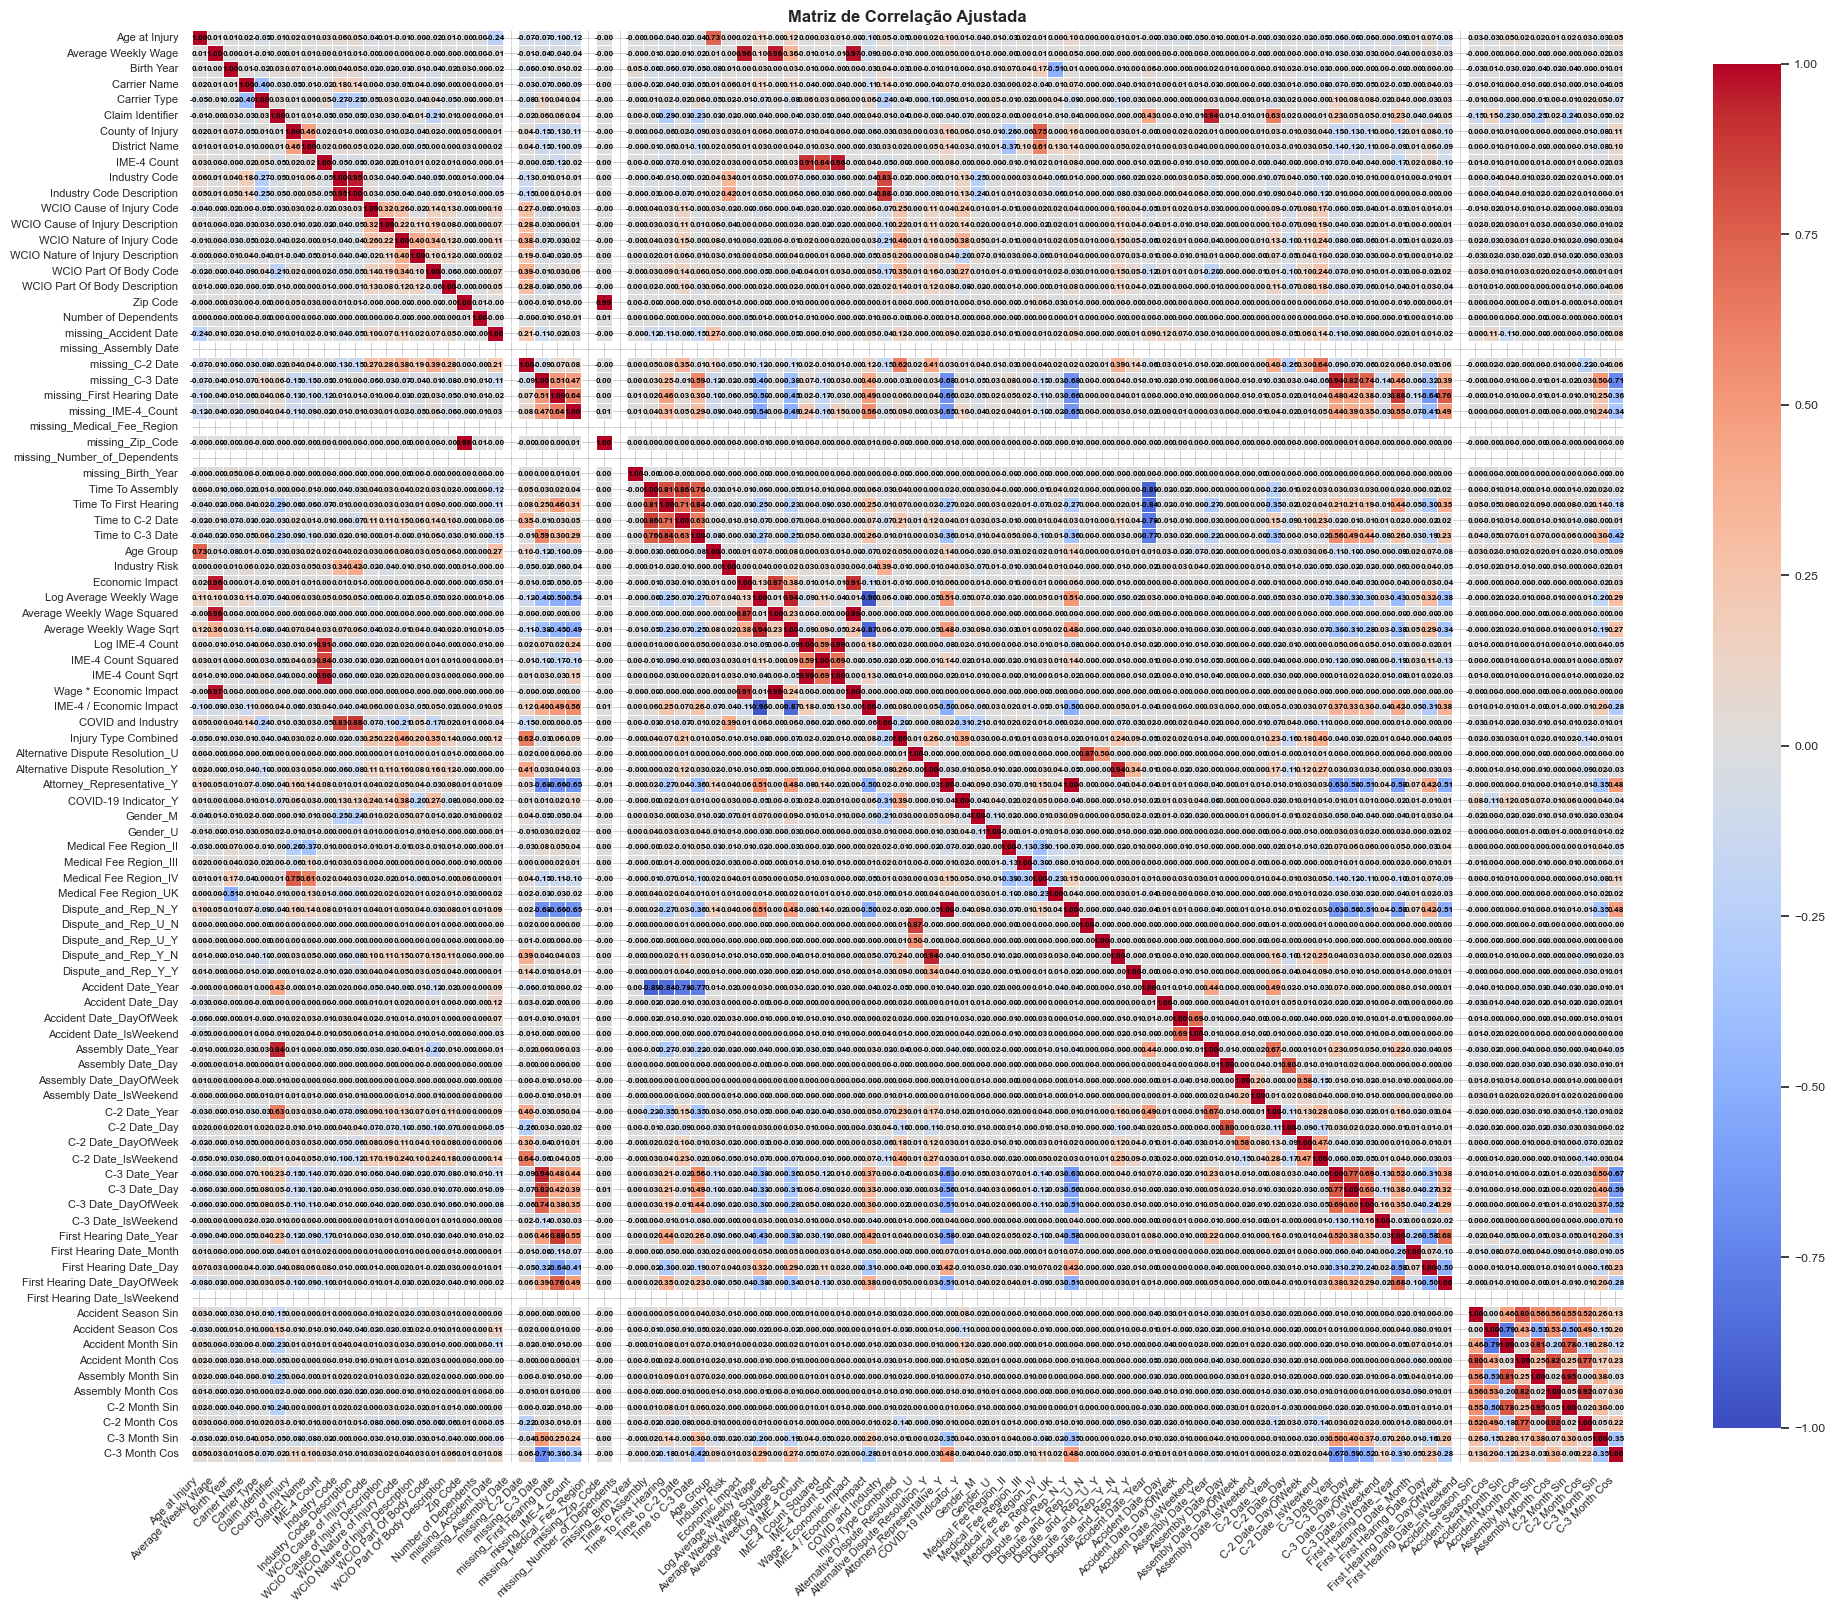

In [34]:
corr_matrix = X_train.select_dtypes(include=['number']).corr()

sns.set(style='whitegrid', font_scale=0.8)

plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            vmin=-1, vmax=1,
            linewidths=0.5,
            square=True,
            cbar_kws={'shrink': 0.8},
            annot_kws={'size': 6, 'weight': 'bold', 'color': 'black'})

# Título e rótulos
plt.title('Matriz de Correlação Ajustada', fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)

plt.grid(visible=True, linewidth=0.5, color='gray', alpha=0.5)
plt.tight_layout()
plt.show()

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The above visualization displays an <strong>Adjusted Correlation Matrix</strong> for all numeric variables in the dataset. The matrix uses a color scale where <span style="color: #D64545;"><strong>red</strong></span> indicates positive correlations and <span style="color: #4A90E2;"><strong>blue</strong></span> indicates negative correlations. The intensity of the color represents the strength of the correlation, ranging from <strong>-1</strong> to <strong>1</strong>. Values close to <strong>0</strong> imply a weak linear relationship.
</p>

<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Key Observations:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li><strong>Diagonal:</strong> As expected, all diagonal values are <strong>1.0</strong>, representing perfect correlations of variables with themselves.</li>
    <li>Variables such as <strong>"Average Weekly Wage"</strong> and <strong>"Log Average Weekly Wage"</strong> show strong positive correlations with each other (values ~0.98), which indicates multicollinearity.</li>
    <li>Several missing indicator variables (e.g., <strong>missing_Assembly Date</strong> and <strong>missing_C0 Date</strong>) display strong positive correlations, reflecting dependencies among missing data patterns.</li>
    <li>There are notable <strong>negative correlations</strong> between <strong>"Age at Injury"</strong> and <strong>"Birth Year"</strong> (~-0.83), which is expected since older ages correspond to earlier birth years.</li>
    <li>Weak to moderate correlations are observed across many derived date fields and alternative duration-related features, which may require careful feature engineering.</li>
</ul>

<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Multicollinearity Concerns:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The matrix highlights multiple instances of <strong>highly correlated variables</strong>, such as:
</p>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li><strong>"Average Weekly Wage"</strong> and its derived variables (<em>Log</em> and <em>Squared</em>) show near-perfect correlations (~0.99).</li>
    <li>Duration-based variables (e.g., <strong>Assembly Date Duration</strong>, <strong>Accident Duration</strong>) display moderate interdependencies, which may lead to redundancy.</li>
    <li>Highly correlated missing indicator variables suggest that certain missingness patterns may not be independent.</li>
</ul>

<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Implications for Modeling:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The presence of multicollinearity and redundant features can impact the performance of machine learning models, particularly linear models like regression. The following steps are recommended:
</p>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li><strong>Feature Selection:</strong> Remove or combine highly correlated variables (e.g., retain <strong>"Average Weekly Wage"</strong> and drop its derivatives).</li>
    <li><strong>Dimensionality Reduction:</strong> Use techniques like <em>PCA (Principal Component Analysis)</em> to reduce redundancy while preserving variance.</li>
    <li><strong>Regularization:</strong> For models like regression, apply regularization techniques (e.g., <em>Lasso</em> or <em>Ridge</em>) to manage correlated variables.</li>
    <li><strong>Missing Data Analysis:</strong> Further analyze patterns in missing indicator variables to understand potential biases or dependencies.</li>
</ul>

<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The correlation matrix reveals significant relationships, particularly among wage-related variables and missing indicators. Addressing multicollinearity through feature selection or dimensionality reduction is essential to build efficient and robust models.
</p>


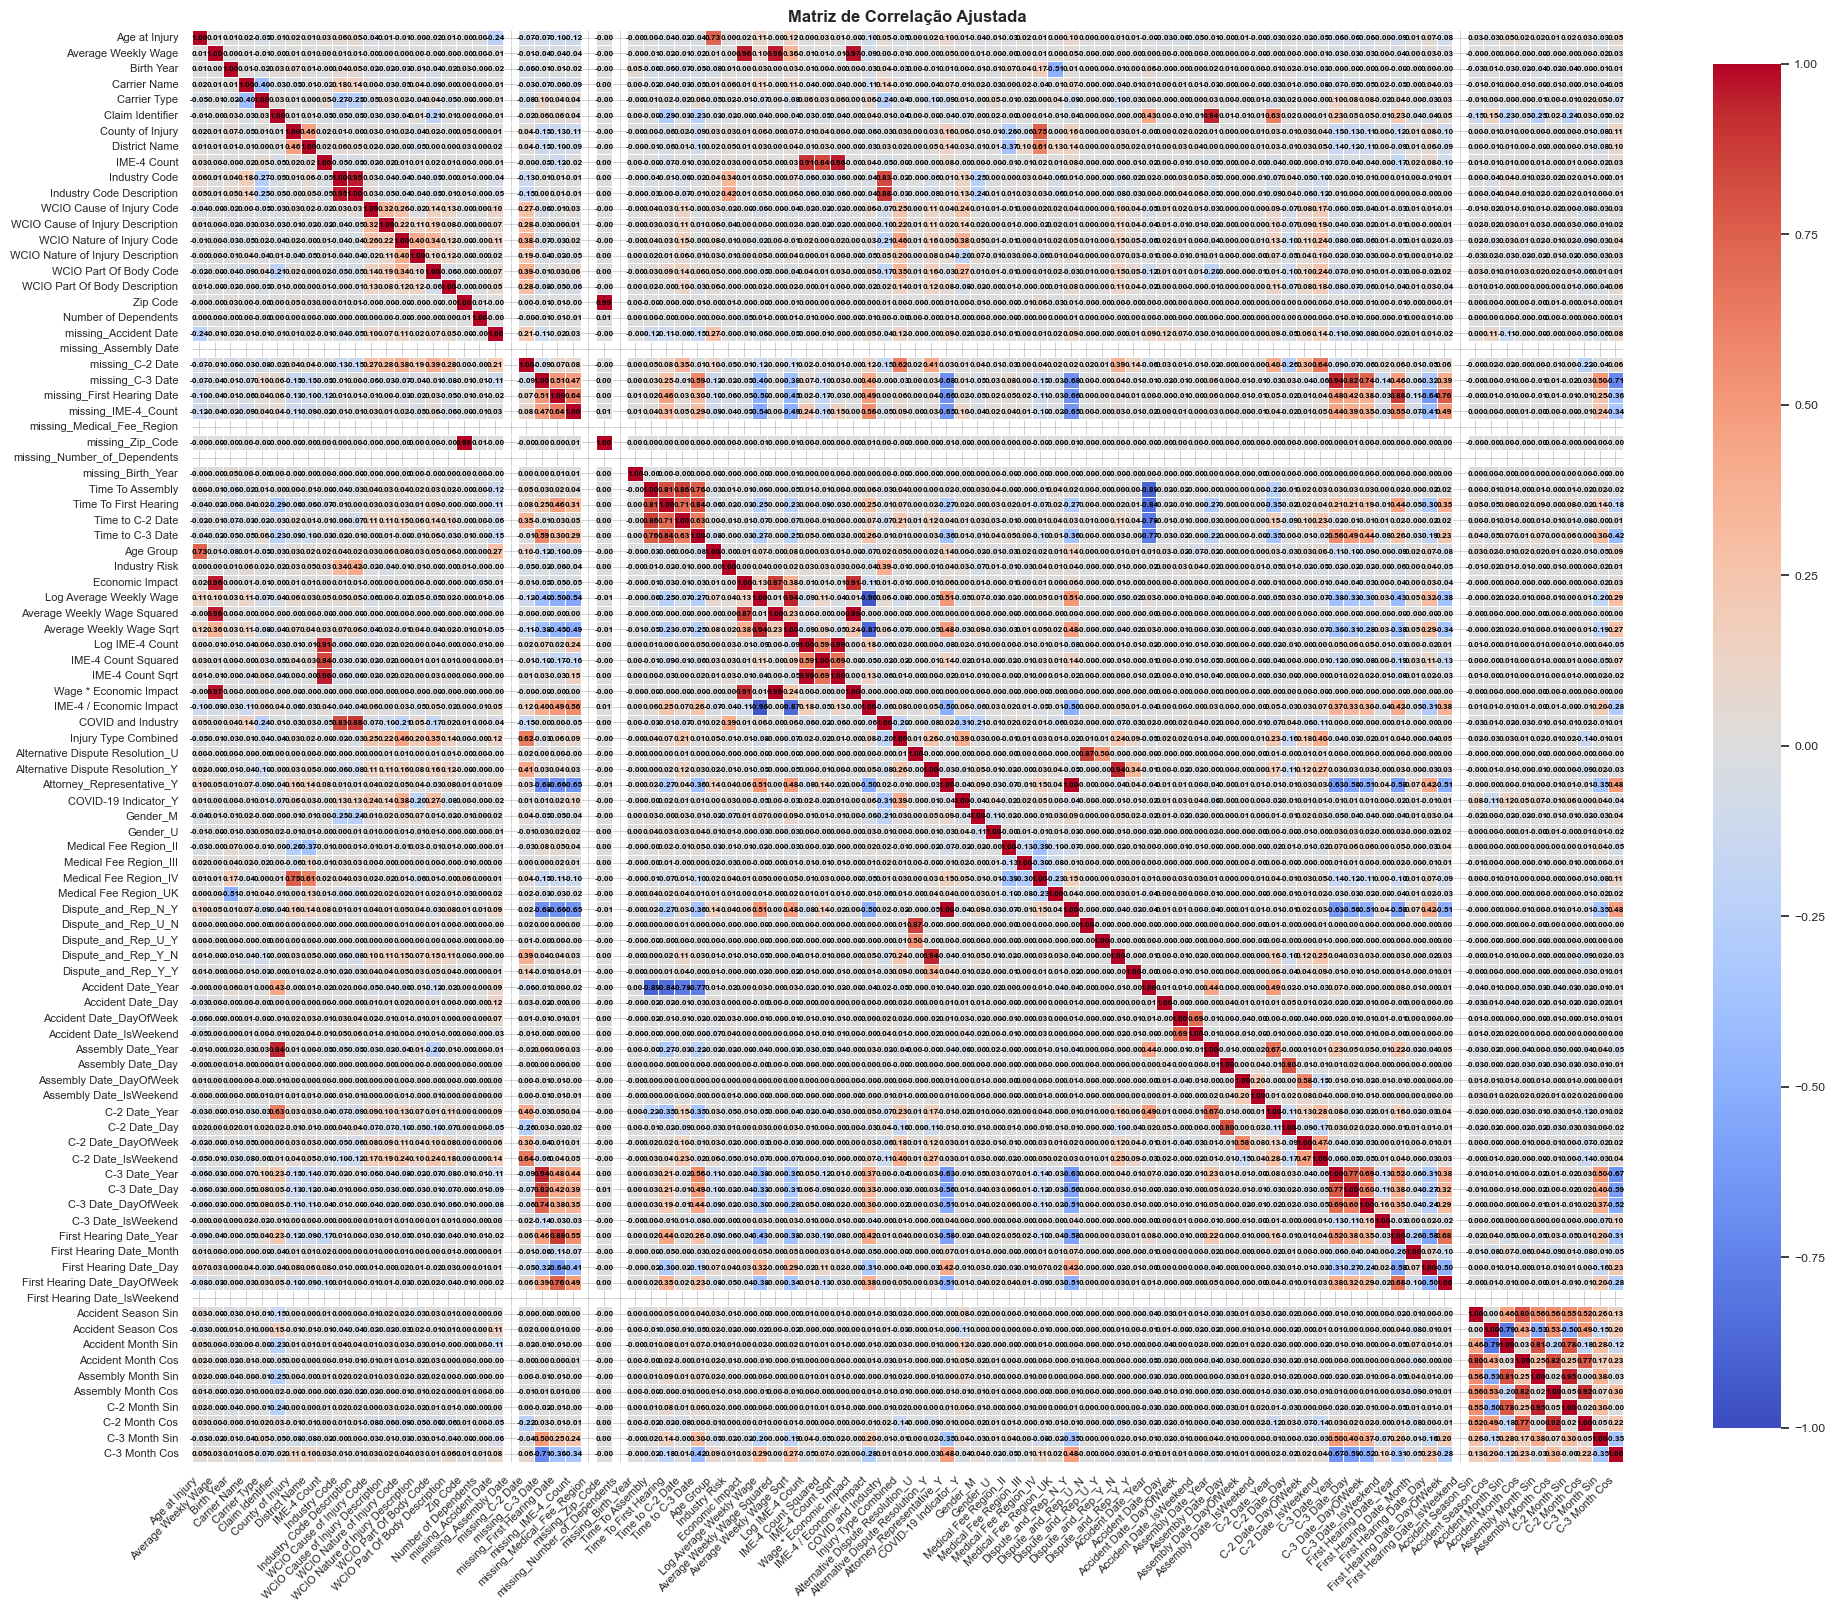

In [35]:
corr_matrix = X_train_ar.select_dtypes(include=['number']).corr()

sns.set(style='whitegrid', font_scale=0.8)

plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            vmin=-1, vmax=1,
            linewidths=0.5,
            square=True,
            cbar_kws={'shrink': 0.8},
            annot_kws={'size': 6, 'weight': 'bold', 'color': 'black'})

# Título e rótulos
plt.title('Matriz de Correlação Ajustada', fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)

plt.grid(visible=True, linewidth=0.5, color='gray', alpha=0.5)
plt.tight_layout()
plt.show()

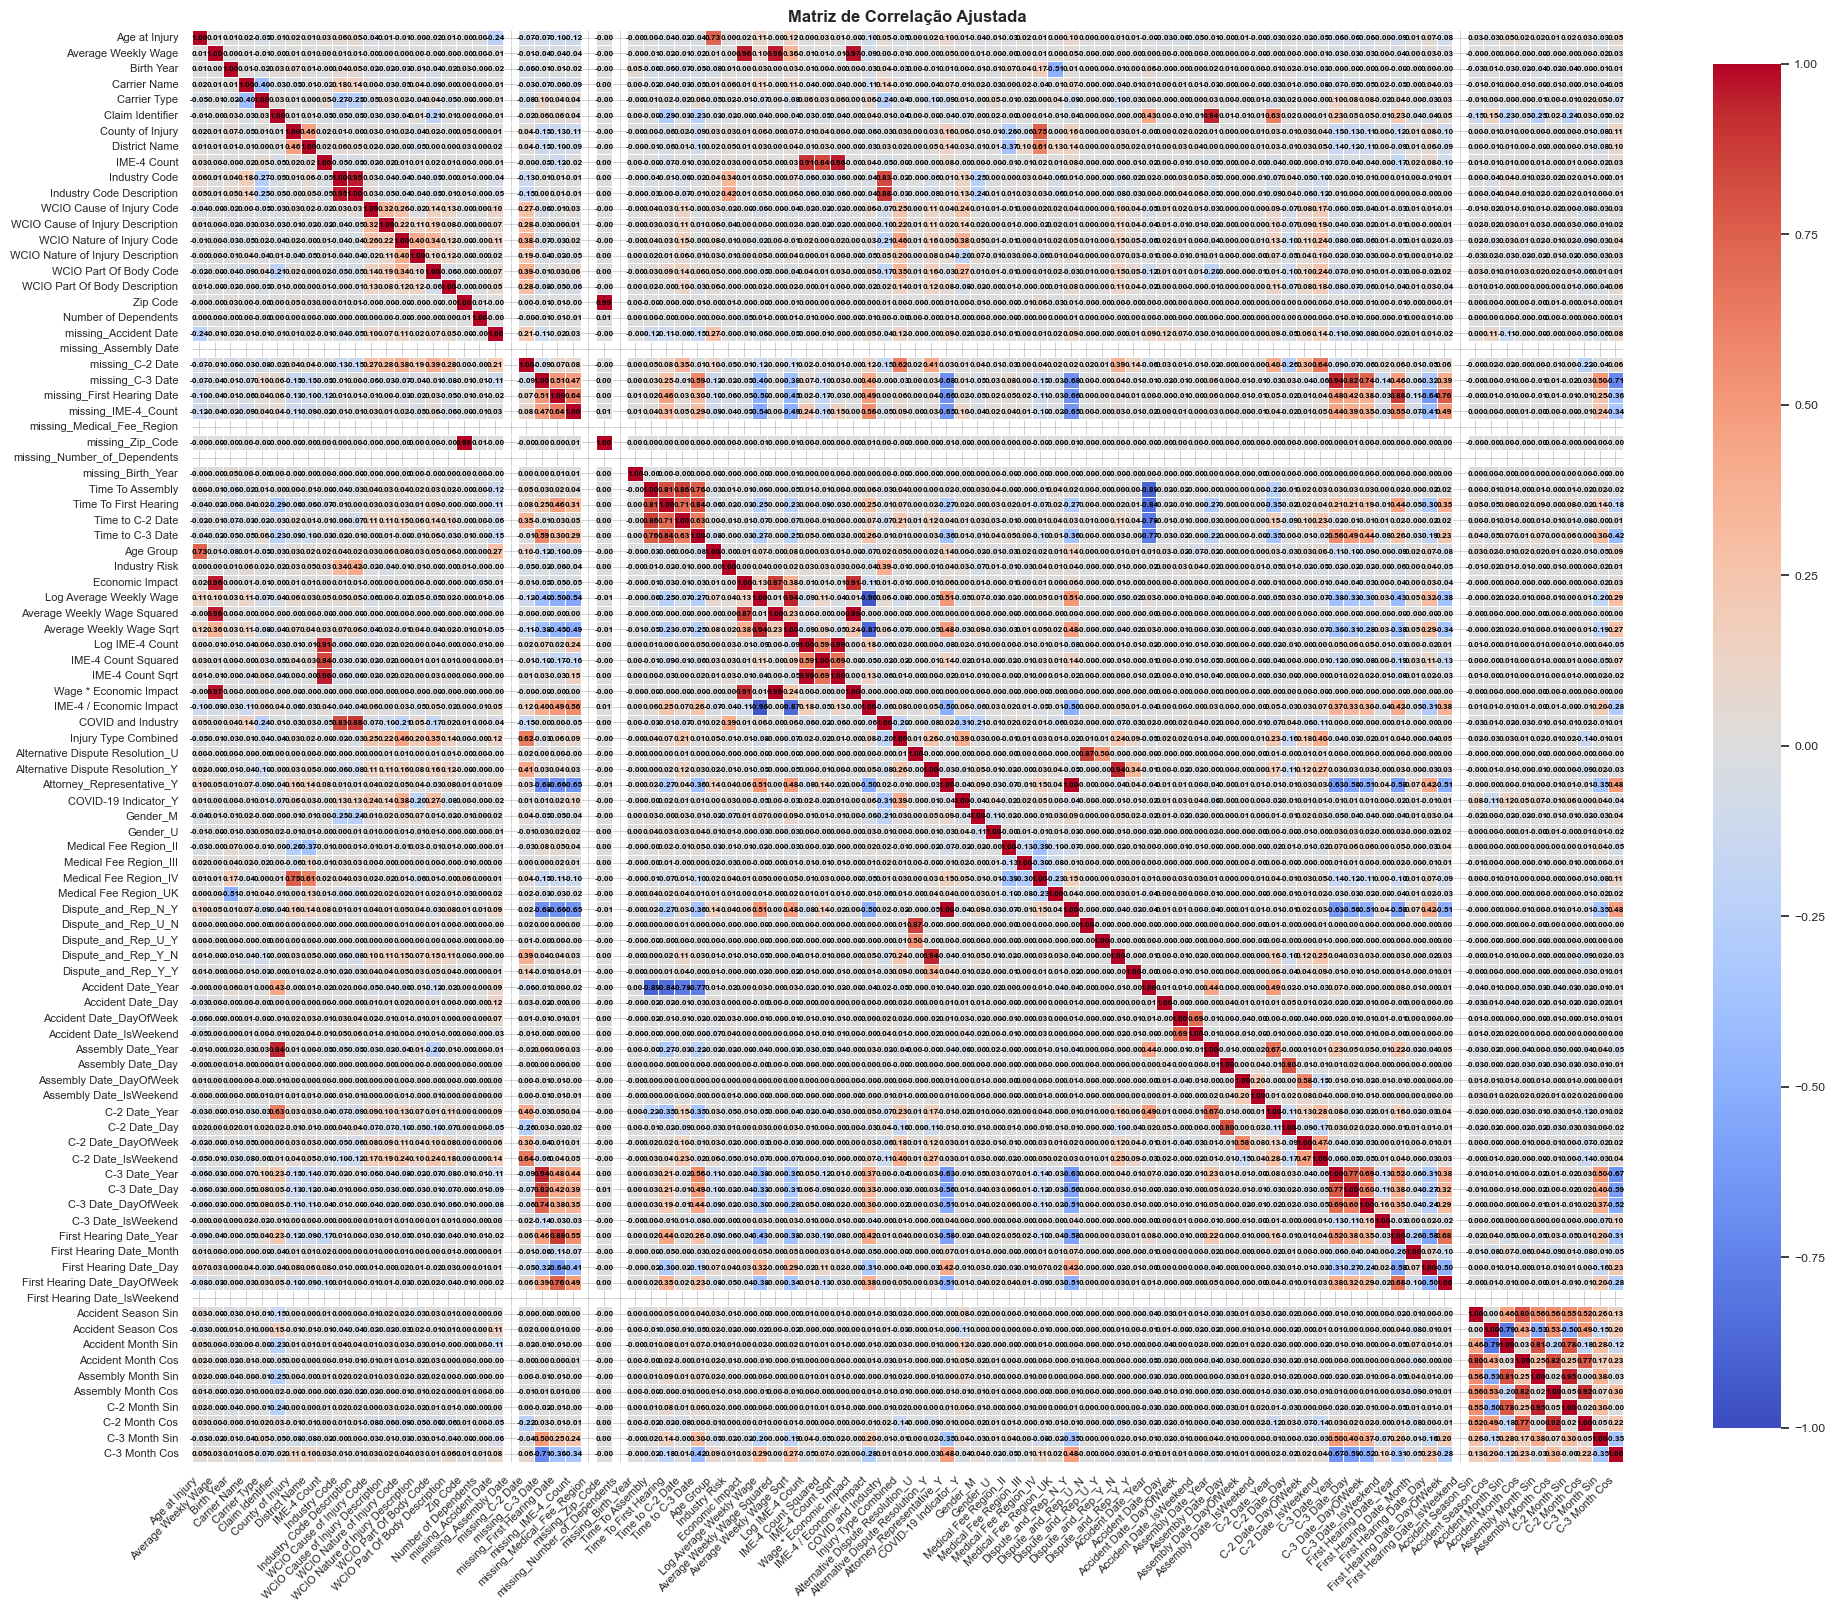

In [36]:
corr_matrix = X_train_wcb.select_dtypes(include=['number']).corr()

sns.set(style='whitegrid', font_scale=0.8)

plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            vmin=-1, vmax=1,
            linewidths=0.5,
            square=True,
            cbar_kws={'shrink': 0.8},
            annot_kws={'size': 6, 'weight': 'bold', 'color': 'black'})

# Título e rótulos
plt.title('Matriz de Correlação Ajustada', fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)

plt.grid(visible=True, linewidth=0.5, color='gray', alpha=0.5)
plt.tight_layout()
plt.show()

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Download DataSet
</h2>
<hr style="border: 1px solid #4A90E2;">


In [37]:
X_train.to_csv("../data/X_train_post_PTD.csv", index=False)
X_train_ar.to_csv("../data/X_train_ar_post_PTD.csv", index=False)
X_train_wcb.to_csv("../data/X_train_wcb_post_PTD.csv", index=False)

In [38]:
y_train.to_csv("../data/y_train_post_PTD.csv", index=False)
y_train_ar.to_csv("../data/y_train_ar_post_PTD.csv", index=False)
y_train_wcb.to_csv("../data/y_train_wcb_post_PTD.csv", index=False)

In [39]:
X_val.to_csv("../data/X_val_post_PTD.csv", index=False)
X_val_ar.to_csv("../data/X_val_ar_post_PTD.csv", index=False)
X_val_wcb.to_csv("../data/X_val_wcb_post_PTD.csv", index=False)

In [40]:
y_val.to_csv("../data/y_val_post_PTD.csv", index=False)
y_val_ar.to_csv("../data/y_val_ar_post_PTD.csv", index=False)
y_val_wcb.to_csv("../data/y_val_wcb_post_PTD.csv", index=False)

In [41]:
data_test.to_csv("../data/data_test_post_PTD.csv", index=False)
data_test_ar.to_csv("../data/data_test_ar_post_PTD.csv", index=False)
data_test_wcb.to_csv("../data/data_test_wcb_post_PTD.csv", index=False)